<a href="https://colab.research.google.com/github/CalebEng/CPS-843-Project/blob/main/EmotionDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#imports:

import torch
import torch.nn as nn
from torch.nn import functional as F
import tensorflow as tf

from google.colab import drive
drive.mount('/content/drive/')
import os

print(tf.__version__)




Mounted at /content/drive/
2.17.1


In [2]:
import os

import cv2

In [3]:
!pip install mediapipe

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.1/36.1 MB 37.2 MB/s eta 0:00:00


# ---------------------------------------------------- Utils ----------------------------------------------------



In [4]:
#add a new cell that has the path here for your drive to access the traininng data (should lead to a folder containing the outer folder for the data)
os.chdir('/content/drive/My Drive/4th year/CPS-843')

# ---------------------------------------------------- Train model ----------------------------------------------------

NEW MODEL

---





Found 6436 validated image filenames belonging to 7 classes.
Found 700 validated image filenames belonging to 7 classes.


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 46, 46, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 46, 46, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 44, 44, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 44, 44, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 20, 20, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 20, 20, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 18, 18, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 18, 18, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 9, 9, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 9, 9, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 7, 7, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 7, 7, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 5, 5, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 5, 5, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 1,678,279 (6.40 MB)

 Trainable params: 1,675,463 (6.39 MB)

 Non-trainable params: 2,816 (11.00 KB)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 3254s 30s/step - accuracy: 0.1809 - loss: 8.7531 - val_accuracy: 0.1469 - val_loss: 6.4626
Epoch 2/50
  1/100 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.2500 - loss: 6.2380

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


100/100 ━━━━━━━━━━━━━━━━━━━━ 31s 312ms/step - accuracy: 0.2500 - loss: 6.2380 - val_accuracy: 0.1667 - val_loss: 6.3036
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 21s 199ms/step - accuracy: 0.2628 - loss: 5.5321 - val_accuracy: 0.1437 - val_loss: 4.5037
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3281 - loss: 3.9747 - val_accuracy: 0.1167 - val_loss: 4.4426
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 42s 209ms/step - accuracy: 0.3340 - loss: 3.6122 - val_accuracy: 0.1609 - val_loss: 3.1912
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3750 - loss: 2.6777 - val_accuracy: 0.1667 - val_loss: 3.1684
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 41s 212ms/step - accuracy: 0.3817 - loss: 2.6098 - val_accuracy: 0.1547 - val_loss: 2.8236
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4531 - loss: 2.2110 - val_accuracy: 0.1667 - val_loss: 2.7449
Epoch 9/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 22s 203ms/step - accuracy: 0.4233 - loss: 2.1412 - val_accuracy

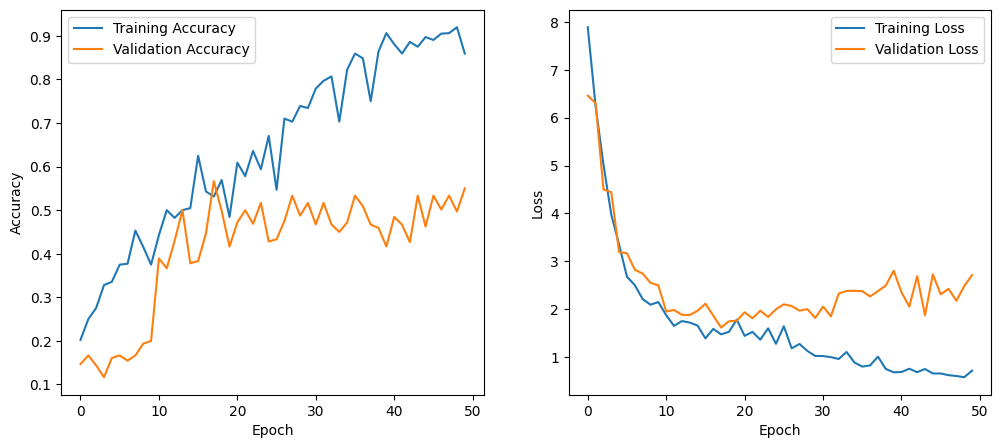

In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.optimizers import Adam

import os
import random
import pandas as pd
import matplotlib.pyplot as plt


# Define directories for training and testing data
train_dir = 'train/'
test_dir = 'test/'

# Function to limit the number of images in a directory
def get_limited_image_files(directory, limit):
    all_image_files = []
    labels = []

    # Iterate over all class subdirectories inside the main directory
    for class_name in os.listdir(directory):
        class_dir = os.path.join(directory, class_name)

        # Only consider directories (ignore non-directory files)
        if os.path.isdir(class_dir):
            image_files = [os.path.join(class_dir, f) for f in os.listdir(class_dir) if f.lower().endswith(('png', 'jpg', 'jpeg'))]

            # If there are more images than the specified limit, sample randomly
            limited_files = random.sample(image_files, min(limit, len(image_files)))

            # Add to the list
            all_image_files.extend(limited_files)
            labels.extend([class_name] * len(limited_files))

    return all_image_files, labels

# Function to create a custom data generator for the limited dataset
def limited_flow_from_directory(directory, target_size, color_mode, class_mode, batch_size, limit):
    image_paths, labels = get_limited_image_files(directory, limit)

    # Shuffle the dataset
    combined = list(zip(image_paths, labels))
    random.shuffle(combined)
    image_paths, labels = zip(*combined)

    # Create a DataFrame for the generator
    df = pd.DataFrame({'filename': image_paths, 'class': labels})

    # Determine the number of unique classes
    num_classes = len(df['class'].unique())

    # Create and return the data generator
    return ImageDataGenerator(rescale=1.0 / 255.0).flow_from_dataframe(
        dataframe=df,
        x_col='filename',
        y_col='class',
        target_size=target_size,
        color_mode=color_mode,
        class_mode=class_mode,
        batch_size=batch_size,
        shuffle=True  # Shuffle training data
    ), num_classes

# Get limited image files for the training and testing directories
train_image_files, _ = get_limited_image_files(train_dir, 1000)  # Limit to 1000 images for training
test_image_files, _ = get_limited_image_files(test_dir, 100)     # Limit to 100 images for testing

# Load Images in Batches (using custom generator that limits the number of images)
train_generator, num_classes_train = limited_flow_from_directory(
    train_dir,
    target_size=(48, 48),
    color_mode="grayscale",
    class_mode='categorical',
    batch_size=64,
    limit=1000  # Limit to 1000 images per class for training
)

test_generator, num_classes_test = limited_flow_from_directory(
    test_dir,
    target_size=(48, 48),
    color_mode="grayscale",
    class_mode='categorical',
    batch_size=64,
    limit=100  # Limit to 100 images per class for testing
)

# Ensure num_classes are the same for both generators
if num_classes_train != num_classes_test:
    raise ValueError(f"Mismatch in number of classes between train and test sets: {num_classes_train} != {num_classes_test}")

# Define the CNN model architecture
def create_improved_model(input_shape=(48, 48, 1), num_classes=num_classes_train):
    model = Sequential()

    # Start with an Input layer to specify input shape
    model.add(tf.keras.layers.Input(shape=input_shape))

    # First convolutional block
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    # Second convolutional block
    model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    # Third convolutional block
    model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    # Flatten and fully connected layers
    model.add(Flatten())
    model.add(Dense(512, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    model.add(Dense(num_classes, activation='softmax'))

    return model


# Instantiate the model
model = create_improved_model(input_shape=(48, 48, 1), num_classes=num_classes_train)

initial_learning_rate = 0.001
lr_schedule = ExponentialDecay(
    initial_learning_rate,
    decay_steps=100000,
    decay_rate=0.96,
    staircase=True
)
optimizer = Adam(learning_rate=lr_schedule)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])


# Display the model architecture
model.summary()

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size,
    epochs=50  # Increase epochs for better training
)

# Plot training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Save the model
model.save('newmodel.h5')




---



OLD MODELS

---





Found 6436 validated image filenames belonging to 7 classes.
Found 700 validated image filenames belonging to 7 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ image_array (Conv2D)                 │ (None, 48, 48, 16)          │             416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 48, 48, 16)          │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 24, 24, 16)          │           6,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 24, 24, 16)          │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 24, 24, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 24, 24, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 24, 24, 32)          │          12,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 24, 24, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 32)          │          25,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 12, 12, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 12, 12, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 12, 12, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 6, 6, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 6, 6, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 559,671 (2.13 MB)

 Trainable params: 557,815 (2.13 MB)

 Non-trainable params: 1,856 (7.25 KB)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 2470s 23s/step - accuracy: 0.1945 - loss: 2.2578 - val_accuracy: 0.1922 - val_loss: 1.9370
Epoch 2/30
  1/100 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.2656 - loss: 1.9401

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


100/100 ━━━━━━━━━━━━━━━━━━━━ 24s 242ms/step - accuracy: 0.2656 - loss: 1.9401 - val_accuracy: 0.1000 - val_loss: 1.9261
Epoch 3/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 188ms/step - accuracy: 0.2640 - loss: 1.8503 - val_accuracy: 0.2078 - val_loss: 1.8984
Epoch 4/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2188 - loss: 1.7759 - val_accuracy: 0.2833 - val_loss: 1.7778
Epoch 5/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 21s 198ms/step - accuracy: 0.3168 - loss: 1.7627 - val_accuracy: 0.2891 - val_loss: 1.7765
Epoch 6/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3750 - loss: 1.7358 - val_accuracy: 0.2333 - val_loss: 1.7827
Epoch 7/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 41s 198ms/step - accuracy: 0.3395 - loss: 1.7006 - val_accuracy: 0.3187 - val_loss: 1.7802
Epoch 8/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.2344 - loss: 1.7222 - val_accuracy: 0.2833 - val_loss: 1.7197
Epoch 9/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 189ms/step - accuracy: 0.3606 - loss: 1.6484 - val_accuracy

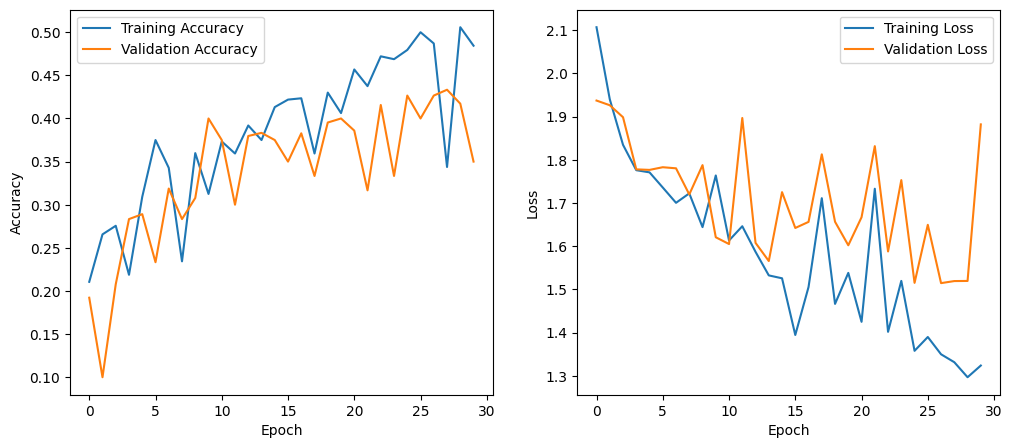

Model saved as emotion_detection_cnn_model.h5
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 214ms/step


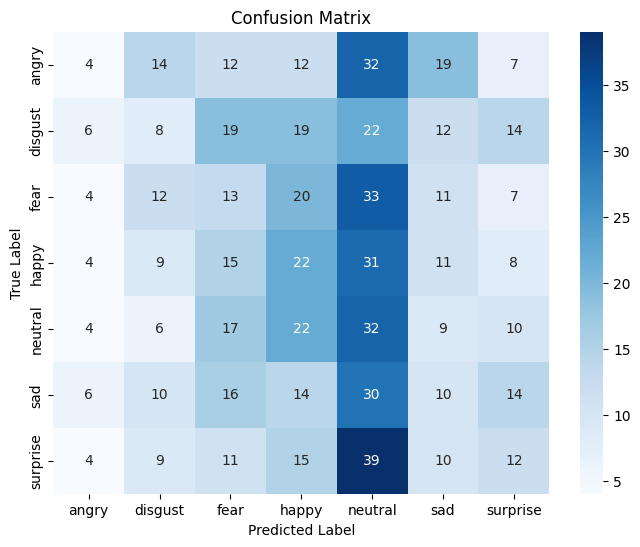

              precision    recall  f1-score   support

       angry       0.12      0.04      0.06       100
     disgust       0.12      0.08      0.10       100
        fear       0.13      0.13      0.13       100
       happy       0.18      0.22      0.20       100
     neutral       0.15      0.32      0.20       100
         sad       0.12      0.10      0.11       100
    surprise       0.17      0.12      0.14       100

    accuracy                           0.14       700
   macro avg       0.14      0.14      0.13       700
weighted avg       0.14      0.14      0.13       700



In [8]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf

# Paths to training and validation directories
train_dir = 'train/'
test_dir = 'test/'

# Function to limit the number of images per class
def get_limited_image_files(directory, limit):
    all_image_files = []
    labels = []

    # Iterate over all class subdirectories inside the main directory
    for class_name in os.listdir(directory):
        class_dir = os.path.join(directory, class_name)

        # Only consider directories (ignore non-directory files)
        if os.path.isdir(class_dir):
            image_files = [os.path.join(class_dir, f) for f in os.listdir(class_dir) if f.lower().endswith(('png', 'jpg', 'jpeg'))]

            # If there are more images than the specified limit, sample randomly
            limited_files = random.sample(image_files, min(limit, len(image_files)))

            # Add to the list
            all_image_files.extend(limited_files)
            labels.extend([class_name] * len(limited_files))

    return all_image_files, labels

# Function to create a custom data generator for the limited dataset
def limited_flow_from_directory(directory, target_size, color_mode, class_mode, batch_size, limit):
    image_paths, labels = get_limited_image_files(directory, limit)

    # Shuffle the dataset
    combined = list(zip(image_paths, labels))
    random.shuffle(combined)
    image_paths, labels = zip(*combined)

    # Create a DataFrame for the generator
    df = pd.DataFrame({'filename': image_paths, 'class': labels})

    # Create and return the data generator
    return ImageDataGenerator(rescale=1.0 / 255.0).flow_from_dataframe(
        dataframe=df,
        x_col='filename',
        y_col='class',
        target_size=target_size,
        color_mode=color_mode,
        class_mode=class_mode,
        batch_size=batch_size,
        shuffle=True  # Shuffle training data
    )

# Get limited image files for the training and testing directories
train_image_files = get_limited_image_files(train_dir, 1000)
test_image_files = get_limited_image_files(test_dir, 100)

# Image Data Generators with Augmentation for Training Set
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Load Images in Batches (using custom generator that limits the number of images)
train_generator = limited_flow_from_directory(
    train_dir,
    target_size=(48, 48),
    color_mode="grayscale",
    class_mode='categorical',
    batch_size=64,
    limit=1000  # Limit to 1000 images per class for training
)

test_generator = limited_flow_from_directory(
    test_dir,
    target_size=(48, 48),
    color_mode="grayscale",
    class_mode='categorical',
    batch_size=64,
    limit=100  # Limit to 100 images per class for testing
)

# Define the CNN model architecture
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Activation

def create_combined_model(input_shape=(48, 48, 1), num_classes=7):
    model = Sequential()

    # First Block
    model.add(Conv2D(16, (5, 5), padding='same', input_shape=input_shape, name='image_array'))
    model.add(BatchNormalization())
    model.add(Conv2D(16, (5, 5), strides=(2, 2), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.25))

    # Second Block
    model.add(Conv2D(32, (5, 5), padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (5, 5), strides=(2, 2), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.25))

    # Third Block
    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3), strides=(2, 2), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.25))

    # Fourth Block
    model.add(Conv2D(64, (1, 1), padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3, 3), strides=(2, 2), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.25))

    # Fifth Block
    model.add(Conv2D(256, (1, 1), padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3, 3), strides=(2, 2), padding='same'))

    # Final Block
    model.add(Conv2D(256, (1, 1), padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(num_classes, (3, 3), strides=(2, 2), padding='same'))

    # Output Layer
    model.add(Flatten())
    model.add(Activation('softmax', name='predictions'))

    return model

# Instantiate the model
model = create_combined_model(input_shape=(48, 48, 1), num_classes=7)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

# Train the Model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size,
    epochs=50
)

# Plot Training History
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Save the Model
model.save('emotion_detection_cnn_model.h5')
print("Model saved as emotion_detection_cnn_model.h5")

# Generate Confusion Matrix
# Get the true labels and predictions
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)  # Convert predictions to class labels
y_true = test_generator.classes       # True labels

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=test_generator.class_indices.keys(),
            yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Optional: Display a classification report
print(classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys()))


In [ ]:
# Load data from the text file

data = temp

# Split data into features (X) and labels (y)
X = data[:, :-1]  # Features (landmarks)
y = data[:, -1]   # Labels (emotions)

# Reshape X to fit CNN input (assuming 1404 landmarks; reshape into a suitable shape)
# Example: reshaping into a 2D format, e.g., 26x54, or adjust based on actual data shape
X = X.reshape(-1, 26, 54, 1)  # Reshape to 26x54 with 1 channel (grayscale)

# Normalize data to range [0, 1]
X = X / np.max(X)

# One-hot encode the labels
y = tf.keras.utils.to_categorical(y, num_classes=7)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Build the CNN model
def build_cnn_model():
    model = Sequential()

    # First convolutional layer
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(26, 54, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Second convolutional layer
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Third convolutional layer
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Flatten and fully connected layers
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))  # Prevent overfitting

    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))

    # Output layer (7 emotions)
    model.add(Dense(7, activation='softmax'))

    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model

# Build the CNN model
cnn_model = build_cnn_model()

# Train the model
history = cnn_model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test))

# Evaluate the model on the test data
test_loss, test_accuracy = cnn_model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Generate classification report and confusion matrix
y_pred = cnn_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

print("Confusion Matrix:")
print(confusion_matrix(y_true_classes, y_pred_classes))

print("\nClassification Report:")
print(classification_report(y_true_classes, y_pred_classes, target_names=['Angry', 'Disgusted', 'Fearful', 'Happy', 'Neutral', 'Sad', 'Surprised']))

# Save the trained model
cnn_model.save('emotion_recognition_cnn.h5')


Epoch 1/100
79/79 [==============================] - 3s 20ms/step - loss: 1.8745 - accuracy: 0.2098 - val_loss: 1.8284 - val_accuracy: 0.2470
Epoch 2/100
79/79 [==============================] - 1s 16ms/step - loss: 1.8455 - accuracy: 0.2301 - val_loss: 1.8157 - val_accuracy: 0.2470
Epoch 3/100
79/79 [==============================] - 1s 16ms/step - loss: 1.8358 - accuracy: 0.2357 - val_loss: 1.8181 - val_accuracy: 0.2470
Epoch 4/100
79/79 [==============================] - 1s 15ms/step - loss: 1.8331 - accuracy: 0.2416 - val_loss: 1.8169 - val_accuracy: 0.2470
Epoch 5/100
79/79 [==============================] - 1s 16ms/step - loss: 1.8269 - accuracy: 0.2476 - val_loss: 1.8166 - val_accuracy: 0.2470
Epoch 6/100
79/79 [==============================] - 1s 15ms/step - loss: 1.8260 - accuracy: 0.2448 - val_loss: 1.8129 - val_accuracy: 0.2470
Epoch 7/100
79/79 [==============================] - 1s 16ms/step - loss: 1.8223 - accuracy: 0.2460 - val_loss: 1.8139 - val_accuracy: 0.2470
Epoch 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/keras/src

In [ ]:
%ls

 emotion_detection_cnn_model.h5         emotion_recognition_cnn.h5   Temp/
 emotion_detection_cnn_model_test5.h5   fer2013.zip                  test/
 emotion-detection-fer.zip             'Research paper.gdoc'         train/


Found 12436 validated image filenames belonging to 7 classes.
Found 1311 validated image filenames belonging to 7 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


194/194 ━━━━━━━━━━━━━━━━━━━━ 5758s 29s/step - accuracy: 0.1663 - loss: 1.9028 - val_accuracy: 0.2180 - val_loss: 1.9233
Epoch 2/50
  1/194 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.2188 - loss: 1.8982

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


194/194 ━━━━━━━━━━━━━━━━━━━━ 14s 71ms/step - accuracy: 0.2188 - loss: 1.8982 - val_accuracy: 0.2258 - val_loss: 1.8594
Epoch 3/50
194/194 ━━━━━━━━━━━━━━━━━━━━ 50s 194ms/step - accuracy: 0.2262 - loss: 1.8512 - val_accuracy: 0.2977 - val_loss: 1.8062
Epoch 4/50
194/194 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.2812 - loss: 1.8731 - val_accuracy: 0.2903 - val_loss: 1.8473
Epoch 5/50
194/194 ━━━━━━━━━━━━━━━━━━━━ 39s 195ms/step - accuracy: 0.2877 - loss: 1.7546 - val_accuracy: 0.3219 - val_loss: 1.7646
Epoch 6/50
194/194 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.4062 - loss: 1.6357 - val_accuracy: 0.1290 - val_loss: 1.9162
Epoch 7/50
194/194 ━━━━━━━━━━━━━━━━━━━━ 39s 194ms/step - accuracy: 0.3334 - loss: 1.6849 - val_accuracy: 0.3336 - val_loss: 1.6987
Epoch 8/50
194/194 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step - accuracy: 0.2656 - loss: 1.7808 - val_accuracy: 0.4516 - val_loss: 1.4997
Epoch 9/50
194/194 ━━━━━━━━━━━━━━━━━━━━ 40s 191ms/step - accuracy: 0.3664 - loss: 1.6216 - val_accurac

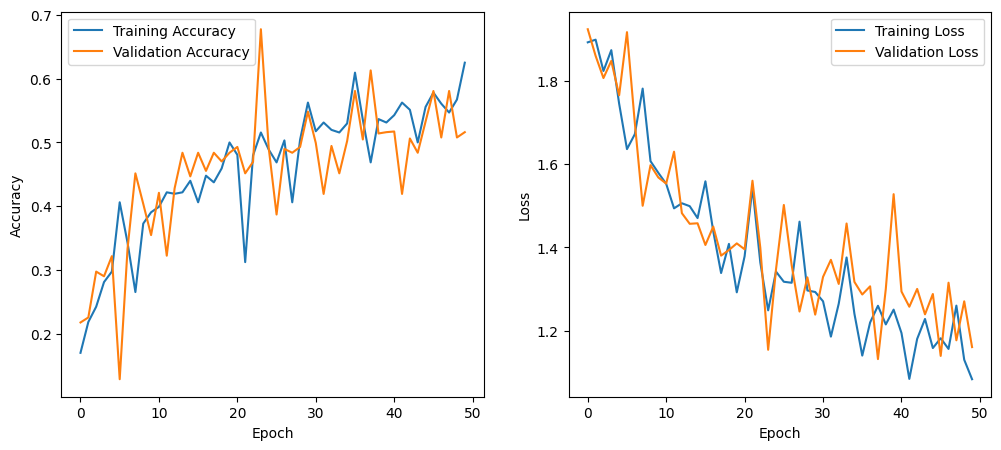

Model saved as emotion_detection_cnn_model.h5
21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 168ms/step


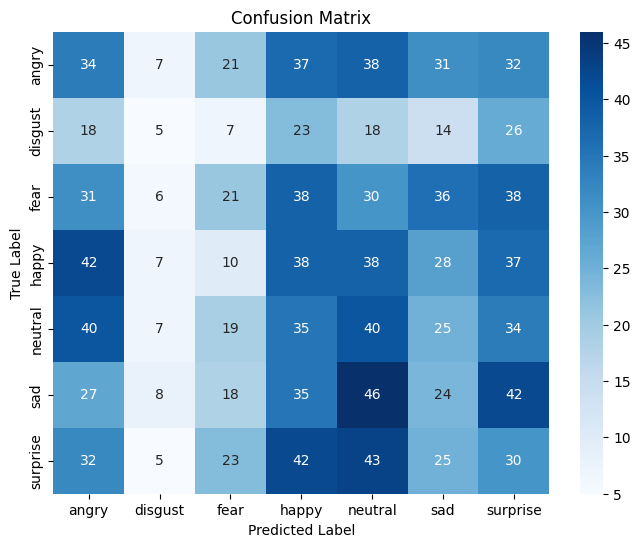

              precision    recall  f1-score   support

       angry       0.15      0.17      0.16       200
     disgust       0.11      0.05      0.06       111
        fear       0.18      0.10      0.13       200
       happy       0.15      0.19      0.17       200
     neutral       0.16      0.20      0.18       200
         sad       0.13      0.12      0.13       200
    surprise       0.13      0.15      0.14       200

    accuracy                           0.15      1311
   macro avg       0.14      0.14      0.14      1311
weighted avg       0.15      0.15      0.14      1311



In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import os
import pandas as pd

# Paths to training and validation directories
train_dir = 'train/'
test_dir = 'test/'

# Function to limit the number of images in each subdirectory
def limited_flow_from_directory(directory, target_size, color_mode, class_mode, batch_size, limit):
    image_paths = []
    labels = []

    # Loop through each subfolder in the directory
    for label in os.listdir(directory):
        label_dir = os.path.join(directory, label)
        if os.path.isdir(label_dir):
            # Get all image files in the subfolder
            files = [f for f in os.listdir(label_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]
            # Select up to 'limit' images
            limited_files = files[:min(limit, len(files))]

            # Create full paths and labels
            for filename in limited_files:
                image_paths.append(os.path.join(label_dir, filename))
                labels.append(label)

    # Shuffle the dataset
    combined = list(zip(image_paths, labels))
    np.random.shuffle(combined)
    image_paths, labels = zip(*combined)

    # Create a DataFrame for the generator
    df = pd.DataFrame({'filename': image_paths, 'class': labels})
    # Create and return the data generator
    return ImageDataGenerator(rescale=1.0/255.0).flow_from_dataframe(
        dataframe=df,
        x_col='filename',
        y_col='class',
        target_size=target_size,
        color_mode=color_mode,
        class_mode=class_mode,
        batch_size=batch_size,
        shuffle=True  # Shuffle training data
    )

# Image Data Generators with Augmentation for Training Set
train_generator = limited_flow_from_directory(
    train_dir,
    target_size=(48, 48),
    color_mode="grayscale",
    class_mode='categorical',
    batch_size=64,
    limit=2000  # Limit to 1000 images per folder
)

# Create the test generator with a limit of 100 images per folder
test_generator = limited_flow_from_directory(
    test_dir,
    target_size=(48, 48),
    color_mode="grayscale",
    class_mode='categorical',
    batch_size=64,
    limit=200  # Limit to 100 images per folder
)

# Define the CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the Model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size,
    epochs=50
)

# Plot Training History
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Save the Model
model.save('emotion_detection_cnn_model_test6.h5')
print("Model saved as emotion_detection_cnn_model.h5")

# Generate Confusion Matrix
# Get the true labels and predictions
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)  # Convert predictions to class labels
y_true = test_generator.classes       # True labels

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=test_generator.class_indices.keys(),
            yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Optional: Display a classification report
print(classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys()))



In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import os
import pandas as pd

# Paths to training and validation directories
train_dir = 'train/'
test_dir = 'test/'

# Function to limit the number of images in each subdirectory
def limited_flow_from_directory(directory, target_size, color_mode, class_mode, batch_size, limit):
    image_paths = []
    labels = []

    # Loop through each subfolder in the directory
    for label in os.listdir(directory):
        label_dir = os.path.join(directory, label)
        if os.path.isdir(label_dir):
            # Get all image files in the subfolder
            files = [f for f in os.listdir(label_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]
            # Select up to 'limit' images
            limited_files = files[:min(limit, len(files))]

            # Create full paths and labels
            for filename in limited_files:
                image_paths.append(os.path.join(label_dir, filename))
                labels.append(label)

    # Shuffle the dataset
    combined = list(zip(image_paths, labels))
    np.random.shuffle(combined)
    image_paths, labels = zip(*combined)

    # Create a DataFrame for the generator
    df = pd.DataFrame({'filename': image_paths, 'class': labels})

    # Create and return the data generator
    return ImageDataGenerator(rescale=1.0/255.0).flow_from_dataframe(
        dataframe=df,
        x_col='filename',
        y_col='class',
        target_size=target_size,
        color_mode=color_mode,
        class_mode=class_mode,
        batch_size=batch_size,
        shuffle=True  # Shuffle training data
    )

# Image Data Generators with Augmentation for Training Set
train_generator = limited_flow_from_directory(
    train_dir,
    target_size=(48, 48),
    color_mode="grayscale",
    class_mode='categorical',
    batch_size=64,
    limit=2000  # Limit to 1000 images per folder
)
# Create the test generator with a limit of 100 images per folder, shuffle set to False
test_generator = limited_flow_from_directory(
    test_dir,
    target_size=(48, 48),
    color_mode="grayscale",
    class_mode='categorical',
    batch_size=64,
    limit=200  # Limit to 100 images per folder
)

# Modify the flow_from_dataframe function to include shuffle=False
def limited_flow_from_directory(directory, target_size, color_mode, class_mode, batch_size, limit):
    image_paths = []
    labels = []

    # Loop through each subfolder in the directory
    for label in os.listdir(directory):
        label_dir = os.path.join(directory, label)
        if os.path.isdir(label_dir):
            # Get all image files in the subfolder
            files = [f for f in os.listdir(label_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]
            # Select up to 'limit' images
            limited_files = files[:min(limit, len(files))]

            # Create full paths and labels
            for filename in limited_files:
                image_paths.append(os.path.join(label_dir, filename))
                labels.append(label)

    # Shuffle the dataset
    combined = list(zip(image_paths, labels))
    np.random.shuffle(combined)
    image_paths, labels = zip(*combined)

    # Create a DataFrame for the generator
    df = pd.DataFrame({'filename': image_paths, 'class': labels})

    # Create and return the data generator with shuffle set to False
    return ImageDataGenerator(rescale=1.0/255.0).flow_from_dataframe(
        dataframe=df,
        x_col='filename',
        y_col='class',
        target_size=target_size,
        color_mode=color_mode,
        class_mode=class_mode,
        batch_size=batch_size,
        shuffle=False  # Shuffle set to False for test data
    )

# Train the Model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size,
    epochs=50
)

# Generate Confusion Matrix
# Get the true labels and predictions
Y_pred = model.predict(test_generator, workers=0)  # Set workers=0 here
y_pred = np.argmax(Y_pred, axis=1)  # Convert predictions to class labels

# Use the index_array to get the true class labels
trueClass = test_generator.classes[test_generator.index_array]

# Compute confusion matrix
conf_matrix = confusion_matrix(trueClass, y_pred)

# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=test_generator.class_indices.keys(),
            yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Optional: Display a classification report
print(classification_report(trueClass, y_pred, target_names=test_generator.class_indices.keys()))


Getting confusion matrix from a trained model

Found 5900 validated image filenames belonging to 7 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


93/93 ━━━━━━━━━━━━━━━━━━━━ 1853s 20s/step


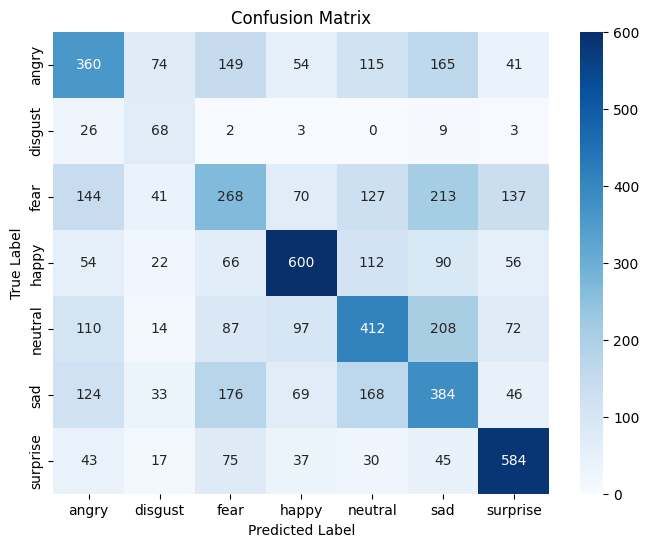

              precision    recall  f1-score   support

       angry       0.42      0.38      0.40       958
     disgust       0.25      0.61      0.36       111
        fear       0.33      0.27      0.29      1000
       happy       0.65      0.60      0.62      1000
     neutral       0.43      0.41      0.42      1000
         sad       0.34      0.38      0.36      1000
    surprise       0.62      0.70      0.66       831

    accuracy                           0.45      5900
   macro avg       0.43      0.48      0.44      5900
weighted avg       0.46      0.45      0.45      5900



In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import os
import pandas as pd
train_dir = 'train/'
test_dir = 'test/'
# Load the previously trained model
model = tf.keras.models.load_model('newmodel.h5')
def limited_flow_from_directory(directory, target_size, color_mode, class_mode, batch_size, limit):
    image_paths = []
    labels = []

    # Loop through each subfolder in the directory
    for label in os.listdir(directory):
        label_dir = os.path.join(directory, label)
        if os.path.isdir(label_dir):
            # Get all image files in the subfolder
            files = [f for f in os.listdir(label_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]
            # Select up to 'limit' images
            limited_files = files[:min(limit, len(files))]

            # Create full paths and labels
            for filename in limited_files:
                image_paths.append(os.path.join(label_dir, filename))
                labels.append(label)

    # Shuffle the dataset
    combined = list(zip(image_paths, labels))
    np.random.shuffle(combined)
    image_paths, labels = zip(*combined)

    # Create a DataFrame for the generator
    df = pd.DataFrame({'filename': image_paths, 'class': labels})

    # Create and return the data generator
    return ImageDataGenerator(rescale=1.0/255.0).flow_from_dataframe(
        dataframe=df,
        x_col='filename',
        y_col='class',
        target_size=target_size,
        color_mode=color_mode,
        class_mode=class_mode,
        batch_size=batch_size,
        shuffle=False  # Shuffle training data
    )
# Recreate the test generator with shuffle set to False
test_generator = limited_flow_from_directory(
    test_dir,
    target_size=(48, 48),
    color_mode="grayscale",
    class_mode='categorical',
    batch_size=64,
    limit=1000  # Limit to 100 images per folder
)
# Make predictions using the loaded model
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)  # Get predicted classes

# Get the true class labels
trueClass = test_generator.classes  # Get true classes directly from the generator

# Compute the confusion matrix
conf_matrix = confusion_matrix(trueClass, y_pred)

# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=test_generator.class_indices.keys(),
            yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Optional: Display a classification report
print(classification_report(trueClass, y_pred, target_names=test_generator.class_indices.keys()))



# ---------------------------------------------------- Test Model NOT FUNCTIONAL IN COLAB----------------------------------------------------

In [ ]:
%ls

 emotion-detection-fer.zip   emotion_recognition_cnn.h5  'Research paper.gdoc'   train/


In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
# Define emotion labels
emotions = ['Angry', 'Disgusted', 'Fearful', 'Happy', 'Neutral', 'Sad', 'Surprised']

# Load the trained CNN model
model = load_model('emotion_recognition_cnn.h5')

# Start video capture from webcam
cap = cv2.VideoCapture(0)

def draw_probabilities(probabilities):
    # Create a black image for the probability graph (width 400, height 300)
    graph = np.zeros((300, 400, 3), dtype=np.uint8)

    # Set the font and other display parameters
    font = cv2.FONT_HERSHEY_SIMPLEX
    bar_width = 50
    max_bar_height = 200  # Max height of the bars in the graph

    # Loop through the probabilities and draw bars
    for i, prob in enumerate(probabilities):
        # Calculate the bar height based on probability
        bar_height = int(prob * max_bar_height)
        x = i * bar_width + 10

        # Draw a filled rectangle representing the bar
        cv2.rectangle(graph, (x, 250 - bar_height), (x + bar_width - 10, 250), (0, 255, 0), -1)

        # Display the emotion label below each bar
        cv2.putText(graph, emotions[i], (x, 270), font, 0.5, (255, 255, 255), 1, cv2.LINE_AA)

        # Display the probability percentage above each bar
        prob_text = f"{prob * 100:.1f}%"
        cv2.putText(graph, prob_text, (x, 240 - bar_height), font, 0.5, (255, 255, 255), 1, cv2.LINE_AA)

    return graph

while True:
    ret, frame = cap.read()

    if not ret:
        break

    # Extract face landmarks from the current frame
    face_landmarks = get_face_landmarks(frame, draw=True, static_image_mode=False)

    if len(face_landmarks) == 1404:  # Ensure the expected number of landmarks
        # Reshape and normalize the landmarks to match the model's input
        face_landmarks = np.array(face_landmarks).reshape(1, 26, 54, 1)  # Reshape for CNN
        face_landmarks = face_landmarks / np.max(face_landmarks)  # Normalize

        # Predict the emotion probabilities
        probabilities = model.predict(face_landmarks)[0]  # Get the first (and only) sample's probabilities
        emotion_index = np.argmax(probabilities)
        emotion_label = emotions[emotion_index]

        # Display the emotion label on the frame
        cv2.putText(frame, emotion_label, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

        # Generate the probability graph
        graph = draw_probabilities(probabilities)

        # Show the probability graph in a separate window
        cv2.imshow('Emotion Probabilities', graph)

    # Show the webcam feed with the predicted emotion
    cv2.imshow('Emotion Recognition', frame)

    # Exit if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release resources
cap.release()
cv2.destroyAllWindows()